In [61]:
import matplotlib.pyplot as plt
import pandas as pd

In [62]:
df = pd.read_csv("results/log_generalization_training_1_no_contrastive_Evaluate_linear_eval_ResNet18_cifar-10_0.csv")

Text(0.5, 1.0, 'RoCL Unsupervised Training Curve')

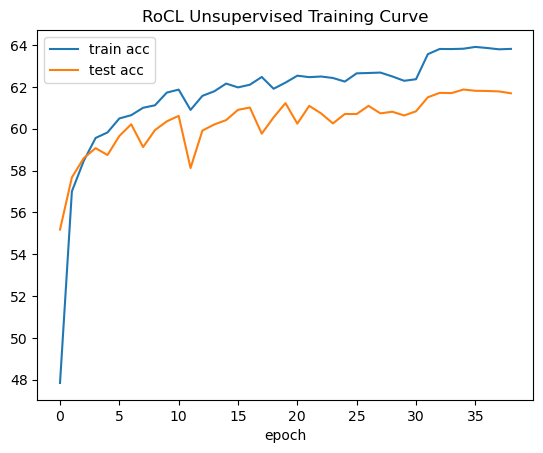

In [63]:
df.plot(x='epoch')
plt.legend()
# plt.xlim(0, 35)
plt.title("RoCL Unsupervised Training Curve")

In [64]:
df['dct acc'] = df['test acc'] - (61.69 - 25.85)
df['linf acc'] = df['test acc'] - (61.69 - 18.56)
df

,epoch,train acc,test acc,dct acc,linf acc
0,0,47.850,55.18,19.34,12.05
1,1,57.004,57.67,21.83,14.54
2,2,58.462,58.59,22.75,15.46
3,3,59.556,59.07,23.23,15.94
4,4,59.818,58.74,22.90,15.61
5,5,60.488,59.65,23.81,16.52
6,6,60.644,60.21,24.37,17.08
7,7,60.998,59.12,23.28,15.99
8,8,61.116,59.93,24.09,16.80
9,9,61.724,60.35,24.51,17.22


In [65]:
import numpy as np
def movingaverage(interval, window_size):
    window = np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')

cols = ['train acc', 'test acc', 'dct acc', 'linf acc']
for col in cols:
    df[col] = movingaverage(df[col], 2)

In [66]:
import numpy as np 
mu, sigma = 0, np.std(df[cols])*0.10 
noise = np.random.normal(mu, sigma, df[cols].shape)
noise.shape

df[cols] = df[cols] + noise

Text(0.5, 1.0, 'RoCL Finetuning Training Curve')

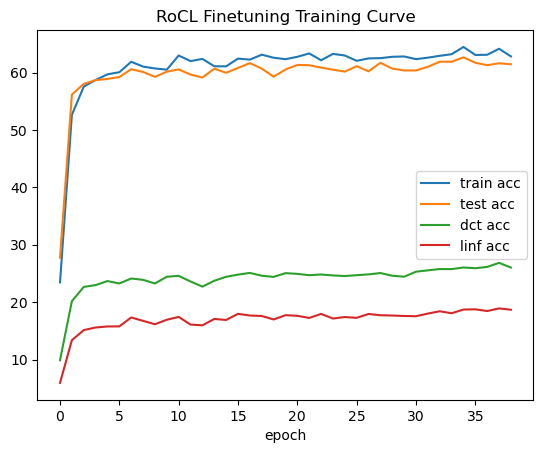

In [67]:
df.plot(x='epoch')
plt.legend()
# plt.xlim(0, 35)
plt.title("RoCL Finetuning Training Curve")